# Description of Dataset

Importing required liababries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

Loading the dataset 

In [3]:
sime= pd.read_csv("DatasetJRCSocialaccountingmatrixEthiopia201516.csv")
sime

,Year,Spending Agent,Spending Agent (Macro-SAM Account),Spending Agent (Code),Receiving Agent,Receiving Agent (Macro-SAM Account),Receiving Agent (Code),Value (Million birr)
0,2016,Addis Ababa,Activities - Households as producers,ahf_AdAb,Animal feed,Commodities,cafeed,0.061748
1,2016,Addis Ababa,Activities - Households as producers,ahf_AdAb,Animal products nec,Commodities,caprod,2.235732
2,2016,Addis Ababa,Activities - Households as producers,ahf_AdAb,Animal products nec own consumed,Commodities,caprodo,0.218507
3,2016,Addis Ababa,Activities - Households as producers,ahf_AdAb,Barley,Commodities,cbar,0.351666
4,2016,Addis Ababa,Activities - Households as producers,ahf_AdAb,Barley own consumed,Commodities,cbaro,5.359490
...,...,...,...,...,...,...,...,...
6046,2016,Wood products,Commodities,cwood,Manufacture of furniture,Activities,aomanu,30.810563
6047,2016,Wood products,Commodities,cwood,Manufacture of metal products,Activities,amprod,30.684470
6048,2016,Wood products,Commodities,cwood,Rest of the world (total),Rest of the World,RoW,2312.700491
6049,2016,Wood products,Commodities,cwood,Trade and transport margin,Margin,TotalMargin,1018.619737


In [4]:
df = pd.read_csv("winequality-red (1).csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
unique_values = df['quality'].unique()

# Print the unique values
print(unique_values)

[5 6 7 4 8 3]


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#dis
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Preprocessing

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

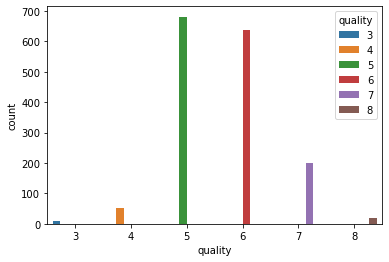

In [10]:
import seaborn as sns
count=df["quality"].value_counts()
sns.countplot(x="quality", hue="quality", data=df);

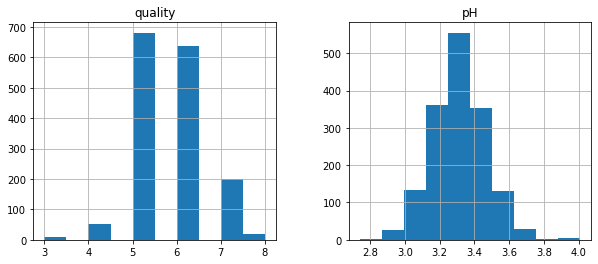

In [12]:
features = ["quality", "pH"]
df[features].hist(figsize=(10, 4));

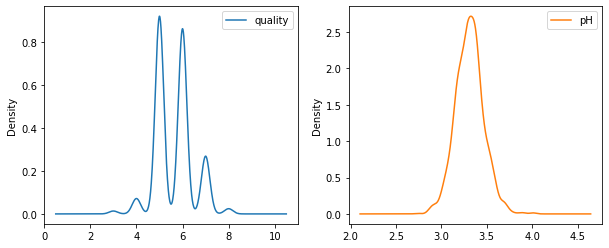

In [13]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

In [ ]:
y = df['quality']
X = df.drop('quality', axis=1)

In [ ]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


# Clustering

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
clusters = kmeans.predict(X)
clusters

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

# Visualization

In [ ]:
pca = PCA(n_components=2) # we have two dimensions to display the visulaization so we r changing our data into two dimensional data pc1 pc2

reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
reduced_X

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [ ]:
reduced_X['cluster'] = clusters
reduced_X

,PC1,PC2,cluster
0,-1.619530,0.450950,1
1,-0.799170,1.856553,1
2,-0.748479,0.882039,1
3,2.357673,-0.269976,0
4,-1.619530,0.450950,1
...,...,...,...
1594,-2.150500,0.814286,1
1595,-2.214496,0.893101,2
1596,-1.456129,0.311746,2
1597,-2.270518,0.979791,1


In [ ]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 2.10942083, -0.98427426],
       [-1.10338833,  0.01026802],
       [-1.26804829, -1.08359729],
       [ 3.52834398,  1.01049765],
       [ 1.58571538,  3.62081388],
       [ 0.11924492,  1.46324484]])

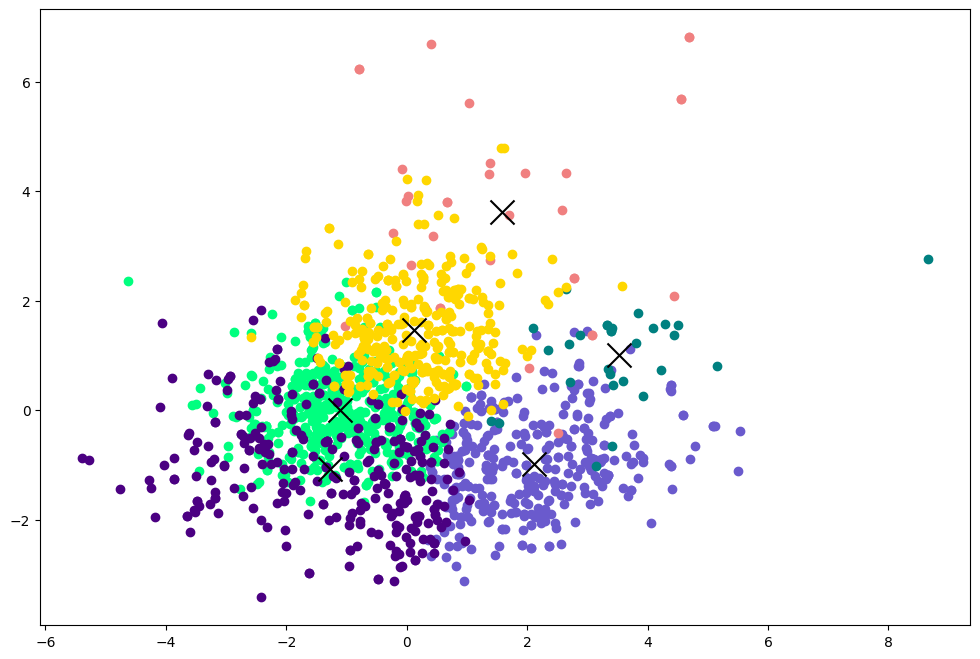

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='slateblue')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='springgreen')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='indigo')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC2'], color='teal')
plt.scatter(reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 4].loc[:, 'PC2'], color='lightcoral')
plt.scatter(reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 5].loc[:, 'PC2'], color='gold')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.show()

# Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=500)

In [ ]:
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 0.65625


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

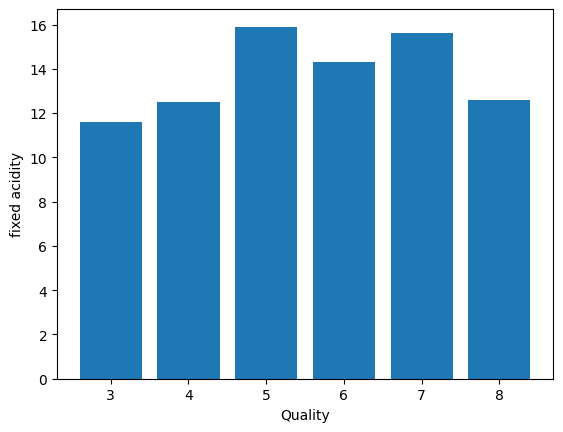

In [ ]:
plt.bar(df['quality'],df['fixed acidity']) # to compare the quality of the wine with the fixed acidity and we can also do this for the r/ships b/n qualiy versus the other attributes
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

In [ ]:
import seaborn as sns

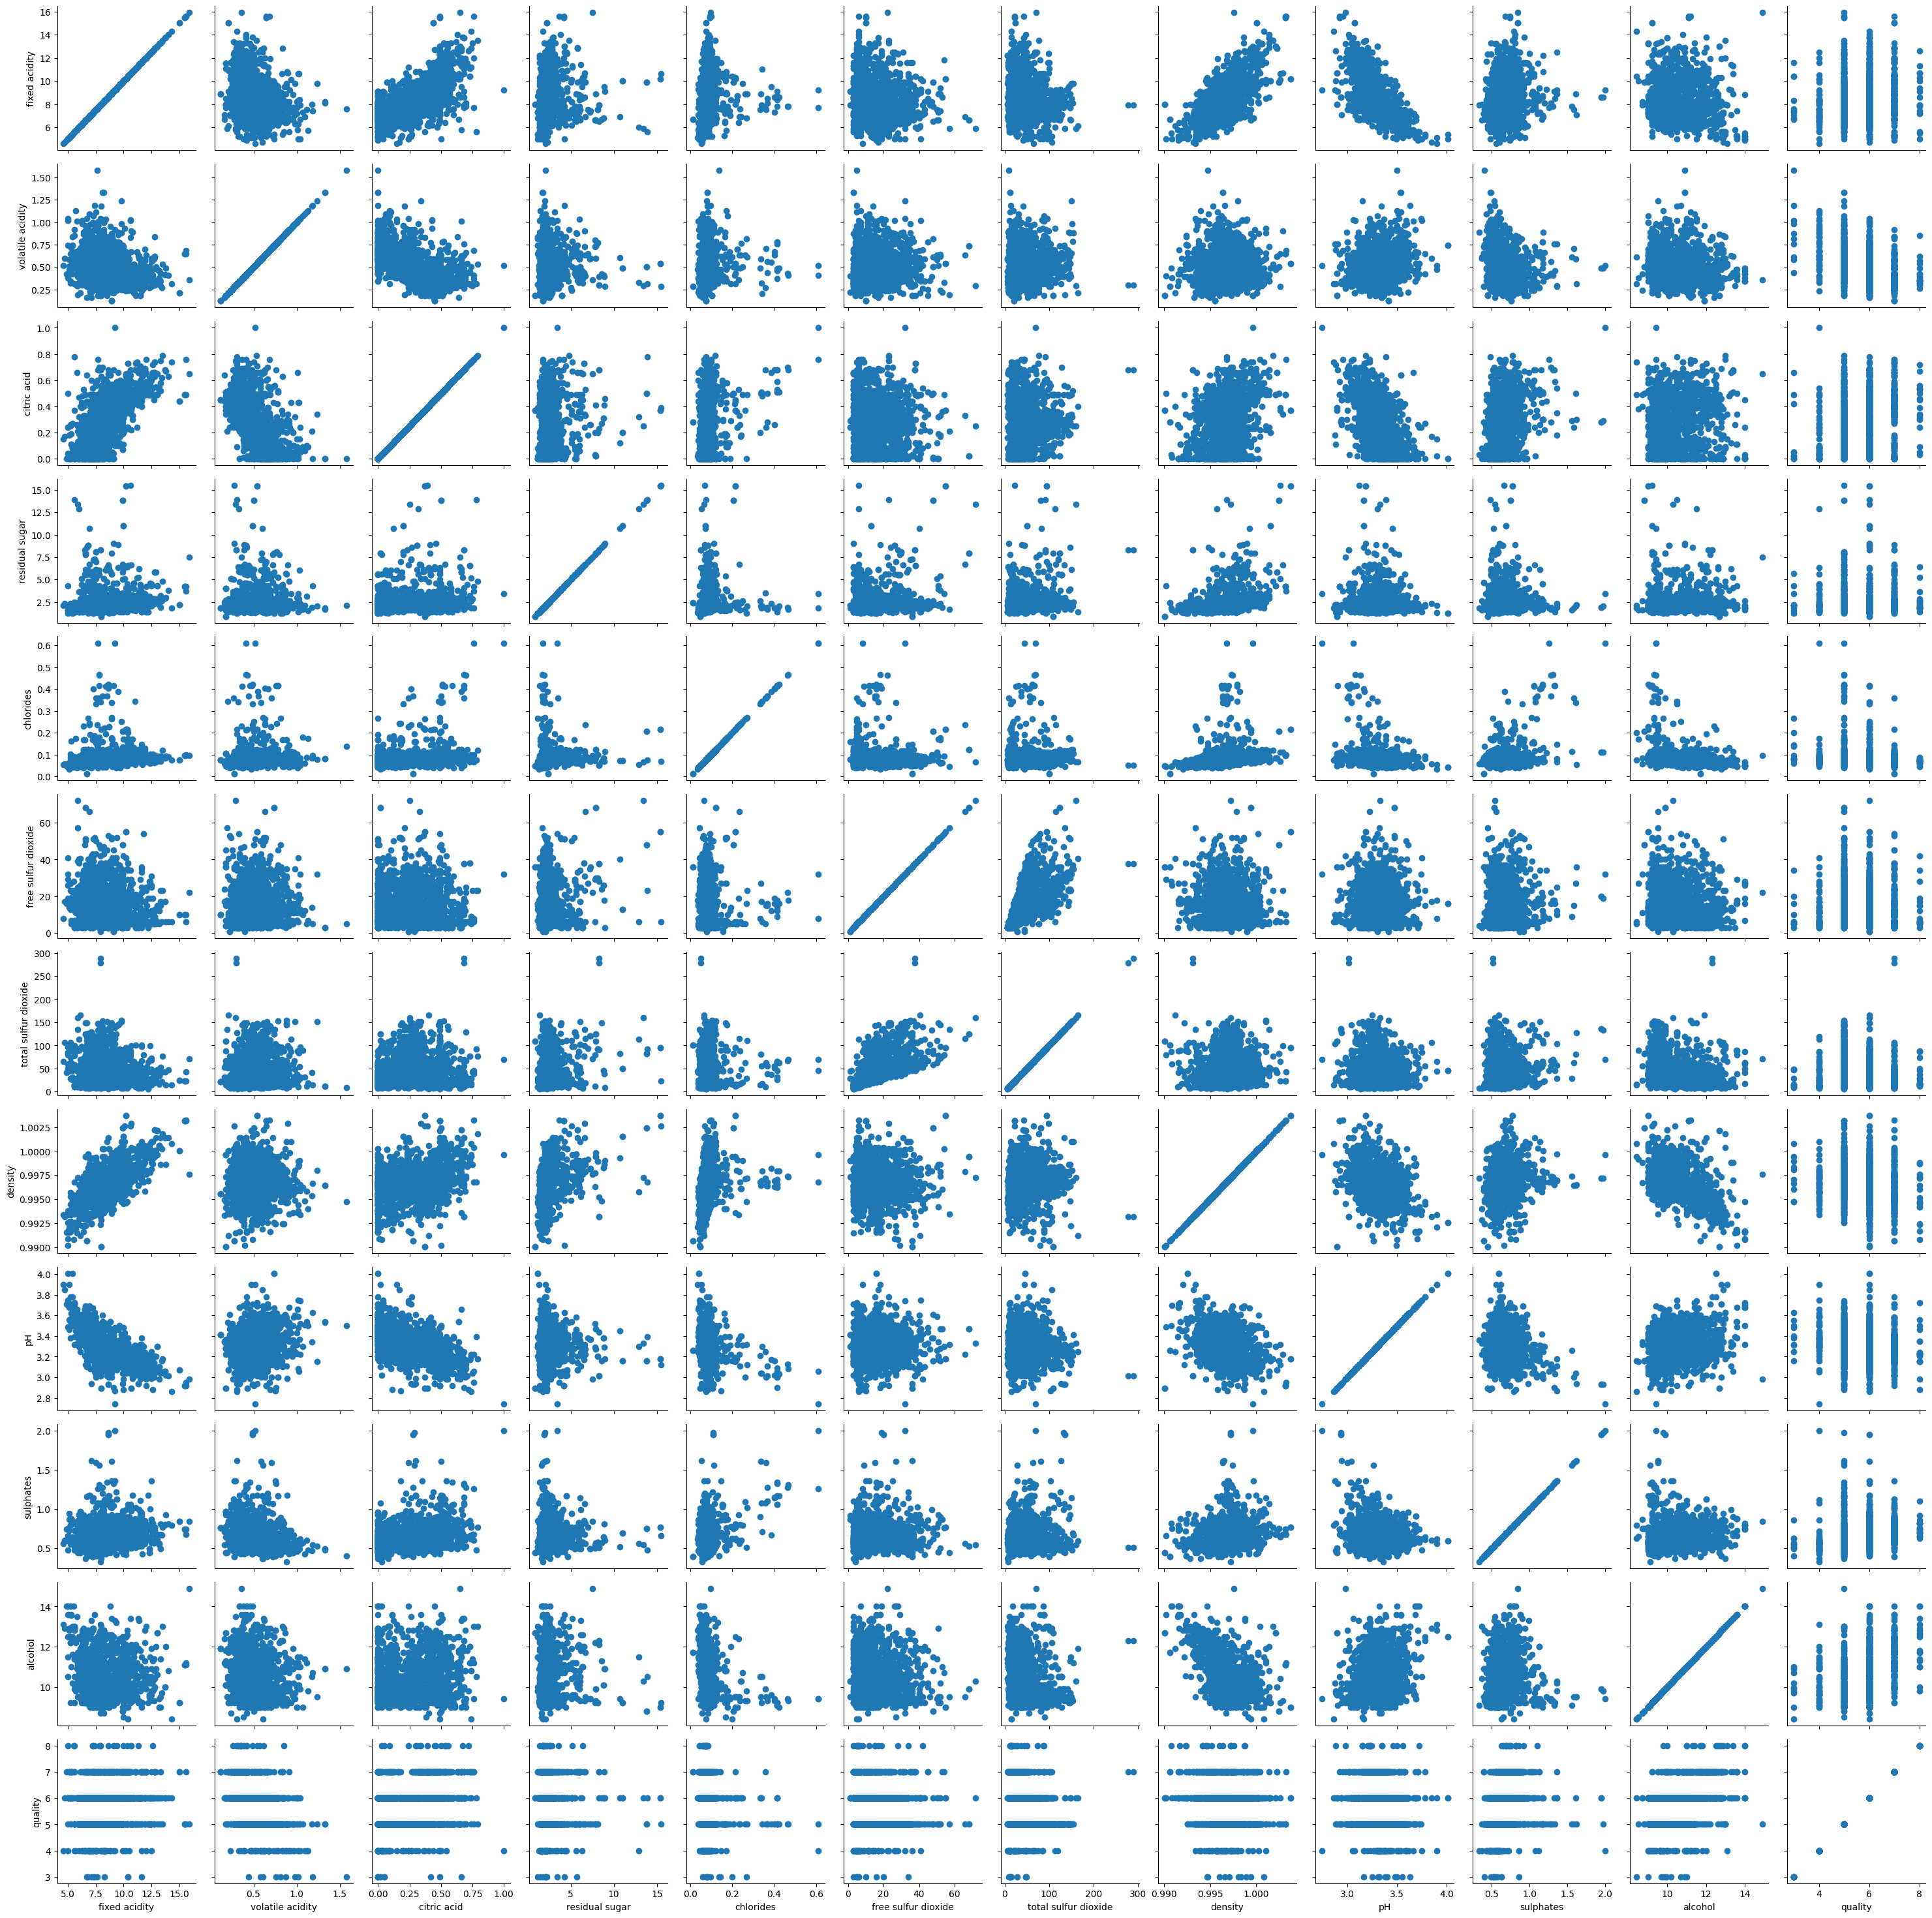

In [ ]:
import matplotlib.pyplot as plt # the combination relationships b/n all attributes 
x= sns.PairGrid(df)
x = x.map(plt.scatter)

<Axes: >

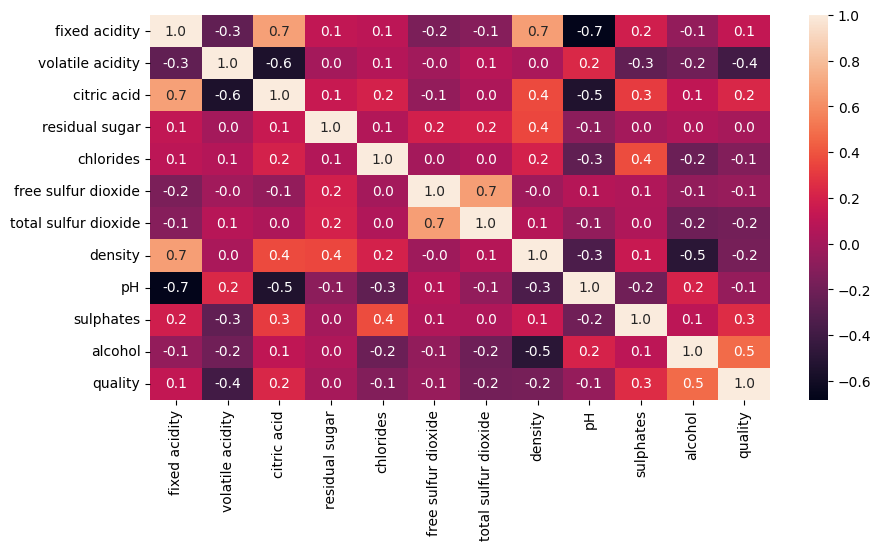

In [ ]:
plt.figure(figsize=(10,5)) # this shows us the density of the relationships of the attributes using heatmap visualization
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

In [ ]:
df['quality'].unique() #For checking the number of classes 



array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality']=[1 if x>=7 else 0 for x in df['quality']] #we catagorize them into two groups

In [ ]:
df['quality'].unique()

array([0, 1])

In [ ]:
df['quality'].value_counts() #to show our dataset structure

0    1382
1     217
Name: quality, dtype: int64

In [ ]:

import seaborn as sns

<Axes: xlabel='quality', ylabel='count'>

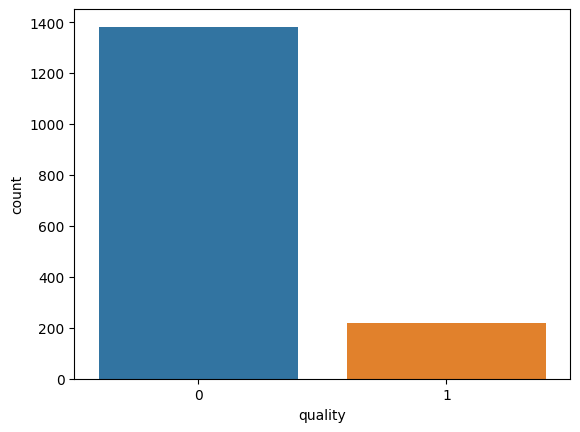

In [ ]:
sns.countplot(x=df["quality"]) #to show the unbalanced dataset

### **IT is cleary shows that our dataset is Unbalanced let`s see what will happen if we work with this unbalanced dataset and we will make it balance and see the difference**

### **Store Feature Matrix In X And Response (Target) In Vector y**

In [ ]:
X = df.drop('quality',axis=1)
y = df['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### **Featuring Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st  =StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [ ]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

### **Applying PCA(Principal component Analysis)**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.90) # we retain 90% of our Data

In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_ #we only comes with seven components here

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9081771725272516

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.853125

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.5

In [ ]:
recall_score(y_test,y_pred1)

0.2765957446808511

In [ ]:
f1_score(y_test,y_pred1)

0.3561643835616438

### **From our result we can see that our Prececision_score, recall_score and f1_score is very low compare to the accracy score,It is because of the Unbalanced data that we were not handling before so we should handle it before we do every methods**

### **Handling the data properly**

### **For Unbalanced data we have to check for Precesion,Recall and f1_Score b/C it is very dengerous to calculate Accuracy in an Unbalanced Dataset so, We are going to handle the unbalanced dataset using SMOTE(Synthetic Minority Oversampling Technique) this technique will allow us to include more data into our calculation so, we are not gonna loss any information.**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

### Now the data becomes balanced so, we could continue our calculation 

### **Next,Splitting The Dataset Into The Training Set And Test Set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st  =StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [ ]:
X_train

array([[-0.72909029, -0.52192848, -0.22155475, ..., -0.06313538,
        -0.4827748 ,  1.09807332],
       [ 0.5441056 , -0.6904003 ,  0.72748057, ..., -0.30637053,
        -0.40987723,  0.81442957],
       [ 0.71315706,  2.41935313, -0.35835276, ...,  0.74077757,
        -0.1941581 ,  0.25956515],
       ...,
       [ 0.31687164,  0.75455064, -1.65995189, ..., -0.83169888,
        -0.44934019, -0.44476096],
       [-0.19263818,  0.96265095, -1.13931224, ..., -0.07964492,
         0.31620609, -0.00455714],
       [-0.7587602 ,  0.8734651 , -1.3475681 , ...,  1.42446299,
        -1.0234999 , -1.23712783]])

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### Applying PCA for dimension reduction 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.90) # I want to retain 90% my data

In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

array([0.29235862, 0.18504214, 0.1436316 , 0.10615666, 0.08489697,
       0.05856335, 0.04727241])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9179217525015587

### **Logistic Regression LR**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.8227848101265823

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.7751677852348994

In [ ]:
recall_score(y_test,y_pred1)

0.8816793893129771

In [ ]:
f1_score(y_test,y_pred1)

0.825

### As we can see here all the Precision , Recall and f1_scorepersentages are approximately in good values w.r.t the accuracy score so, now we can proceed with the handled dataset for the rest of the methods

### **SVM(Support Vector Machine)**

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8679927667269439

In [ ]:
precision_score(y_test,y_pred2)

0.8203389830508474

In [ ]:
recall_score(y_test,y_pred2)

0.9236641221374046

In [ ]:
f1_score(y_test,y_pred2)

0.8689407540394972

### **KNeighbors Classifier(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8752260397830018

In [ ]:
precision_score(y_test,y_pred3)

0.8063492063492064

In [ ]:
recall_score(y_test,y_pred3)

0.9694656488549618

In [ ]:
f1_score(y_test,y_pred3)

0.8804159445407279

### **Random Forest(RF) Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred4 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.918625678119349

In [ ]:
precision_score(y_test,y_pred4)

0.8780487804878049

In [ ]:
recall_score(y_test,y_pred4)

0.9618320610687023

In [ ]:
f1_score(y_test,y_pred4)

0.918032786885246

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100]})

In [ ]:
final_data

,Models,ACC
0,LR,82.278481
1,SVC,86.799277
2,KNN,87.522604
3,RF,91.862568


In [ ]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

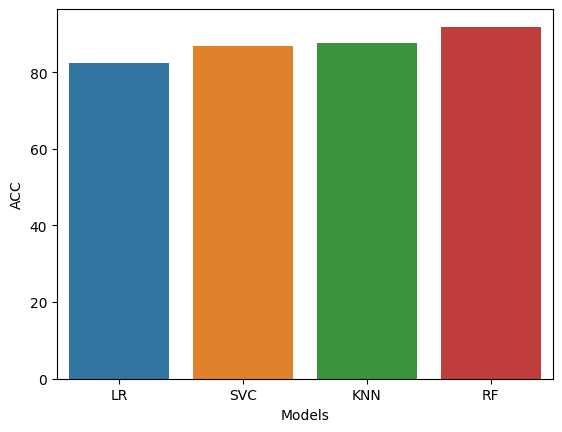

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

### **Save Models**

In [ ]:
X = df.drop('quality',axis=1)
y = df['quality']

In [ ]:
from imblearn.over_sampling import SMOTE #to include the minority values
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X_res)

In [ ]:
X = pca.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'wine_quality_prediction')

['wine_quality_prediction']

In [ ]:
model = joblib.load('wine_quality_prediction')

In [ ]:
import pandas as pd
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.065,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,
     
},index=[0])

### **We are now giving the system a new values to predict **

In [ ]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [ ]:
test = pca.transform(st.transform(new_data))

In [ ]:
p = model.predict(test)

In [ ]:
if p[0] == 1: 
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine
